# Information: 
In this example, a dataset with 5000 rows and two columns are dealt. It is an example of unsupervised learning.

KMEANS in spark is used for clustering. This example is taken from DataCamp. (www.datacamp.com)

In [1]:
# Importing some important libraries

import findspark
findspark.init("path_to_spark-3.1.2-bin-hadoop3.2")


from pyspark import SparkConf
from pyspark.context import SparkContext

sc = SparkContext.getOrCreate(SparkConf())

from pyspark.sql import SparkSession
spark=SparkSession.builder.getOrCreate()


In [3]:
# Constructing RDD by loading the dataset.

clusterRDD = sc.textFile("5000_points.txt")    

# Split the RDD based on tab
rdd_split = clusterRDD.map(lambda x: x.split("\t")) # This step is required because above RDD is just a single list with strings

# Transform the split RDD by creating a list of integers
rdd_split_int = rdd_split.map(lambda x: [int(x[0]), int(x[1])]) # Coverting both the columns into integer

# Count the number of rows in RDD 
print("There are {} rows in the rdd_split_int dataset".format(rdd_split_int.count()))   # Just checking the size

There are 5000 rows in the rdd_split_int dataset


- As Expected:  5000 rows are there

In [4]:
#---------------------This error function will be used in the following calculations--------------------------------
from math import sqrt
def error(point):
    center = model.centers[model.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))
#------------------------------------------------------------


from pyspark.mllib.clustering import KMeans


for clst in range(13, 17):
    model = KMeans.train(rdd_split_int, clst, seed=1)
    WSSSE = rdd_split_int.map(lambda point: error(point)).reduce(lambda x, y: x + y)
    print("The cluster {} has Within Set Sum of Squared Error {}".format(clst, WSSSE))




The cluster 13 has Within Set Sum of Squared Error 252060331.1260039
The cluster 14 has Within Set Sum of Squared Error 215808893.2796594
The cluster 15 has Within Set Sum of Squared Error 169394691.52639425
The cluster 16 has Within Set Sum of Squared Error 168103213.0429197


# Note:
It is found here that K=16 is the best.

In [13]:
# Train the model again with the best k 
model = KMeans.train(rdd_split_int, k=16, seed=1)

# Get cluster centers
cluster_centers = model.clusterCenters

print(cluster_centers) Just for Checking


[array([417799.69426752, 787001.99363057]), array([852058.45259939, 157685.52293578]), array([858947.9713467 , 546259.65902579]), array([381158.4040404 , 394705.36868687]), array([670929.06818182, 862765.73295455]), array([167529.        , 347702.66966967]), array([617926.67761194, 399415.94925373]), array([507818.31339031, 175610.41595442]), array([320602.55, 161521.85]), array([244654.8856305 , 847642.04105572]), array([823421.2507837 , 731145.27272727]), array([606574.95622896, 574455.16835017]), array([801616.78164557, 321123.34177215]), array([337565.11890244, 562157.17682927]), array([139682.37572254, 558123.40462428]), array([420849.46103896, 417929.49350649])]


In [20]:
# Convert rdd_split_int RDD into Spark DataFrame
rdd_split_int_df = spark.createDataFrame(rdd_split_int, schema=["col1", "col2"])

# Convert Spark DataFrame into Pandas DataFrame
rdd_split_int_df_pandas = rdd_split_int_df.toPandas()

import pandas as pd
import matplotlib.pyplot as plt

# Convert "cluster_centers" that you generated earlier into Pandas DataFrame
cluster_centers_pandas = pd.DataFrame(cluster_centers, columns=["col1", "col2"])

In [21]:
# Just checking what we have so far!

print(rdd_split_int.take(6))
print(rdd_split_int_df.show(6))
print(rdd_split_int_df_pandas.iloc[0:6,:])
print(cluster_centers_pandas.iloc[0:6,:])

print(type(rdd_split_int))
print(type(rdd_split_int_df))

print(type(rdd_split_int_df_pandas))
print(type(cluster_centers_pandas))



[[664159, 550946], [665845, 557965], [597173, 575538], [618600, 551446], [635690, 608046], [588100, 557588]]
+------+------+
|  col1|  col2|
+------+------+
|664159|550946|
|665845|557965|
|597173|575538|
|618600|551446|
|635690|608046|
|588100|557588|
+------+------+
only showing top 6 rows

None
     col1    col2
0  664159  550946
1  665845  557965
2  597173  575538
3  618600  551446
4  635690  608046
5  588100  557588
            col1           col2
0  417799.694268  787001.993631
1  852058.452599  157685.522936
2  858947.971347  546259.659026
3  381158.404040  394705.368687
4  670929.068182  862765.732955
5  167529.000000  347702.669670
<class 'pyspark.rdd.PipelinedRDD'>
<class 'pyspark.sql.dataframe.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


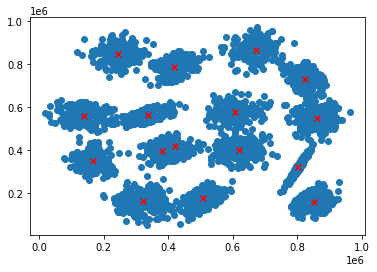

In [22]:
# Create an overlaid scatter plot
plt.scatter(rdd_split_int_df_pandas["col1"], rdd_split_int_df_pandas["col2"])
plt.scatter(cluster_centers_pandas["col1"], cluster_centers_pandas["col2"], color="red", marker="x")
plt.show()



# Conclusion:

It is clear from the above graph that the cluster centers/centroids map to the original data.